In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Classification Project 1: Heart Disease Prediction
**Algorithm used: Logistic Regression**
*Dataset:* https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
**Features(Training):**
1. age(in years)
2. sex(1=male, 0=female)
3. cp(chest pain type-0, 1, 2, 3)
4. trestbps(resting blood pressure in mm Hg on admission to the hospital)
5. chol(serum cholestoral in mg/dl)
6. fbs(fasting blood sugar, 1=true, 0=false)
7. restecg(resting electrocardiographic results)
8. thalach(maximum heart rate achieved)
9. exang(excercise induced angina, 1=yes, 0=no)
10. oldpeak(ST depression induced by excercise relative to rest)
11. slope(the slope of peak excercise ST segment 0-2)
12. ca(number of major vessels, 0-4)
13. thal(1=normal, 2=fixed defect, 3=reversable defect)

**Feature(Testing/Target):**
target(0=no heart disease, 1=has heart disease)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

<Axes: xlabel='target'>

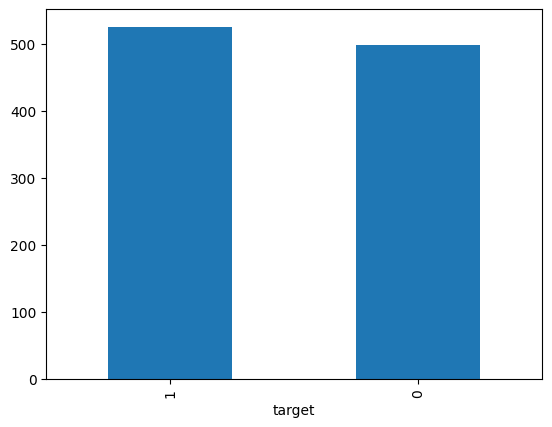

In [5]:
df.target.value_counts().plot(kind='bar')

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
len(df.columns)

14

In [9]:
#printing unique values of each column along with its count
for col in df.columns:
    print(f"{col}:{df[col].unique()}:{len(df[col].unique())}")

age:[52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]:41
sex:[1 0]:2
cp:[0 1 2 3]:4
trestbps:[125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]:49
chol:[212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 216 264 276 322 214 273 253 176 284 305 168
 407 290 277 262 195 166 178 141]:152
f

In [10]:
#seperating columns as categorical and continuous
categorical_val = []
continuous_val = []
for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continuous_val.append(column)

In [11]:
print(categorical_val)

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


In [12]:
print(continuous_val)

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


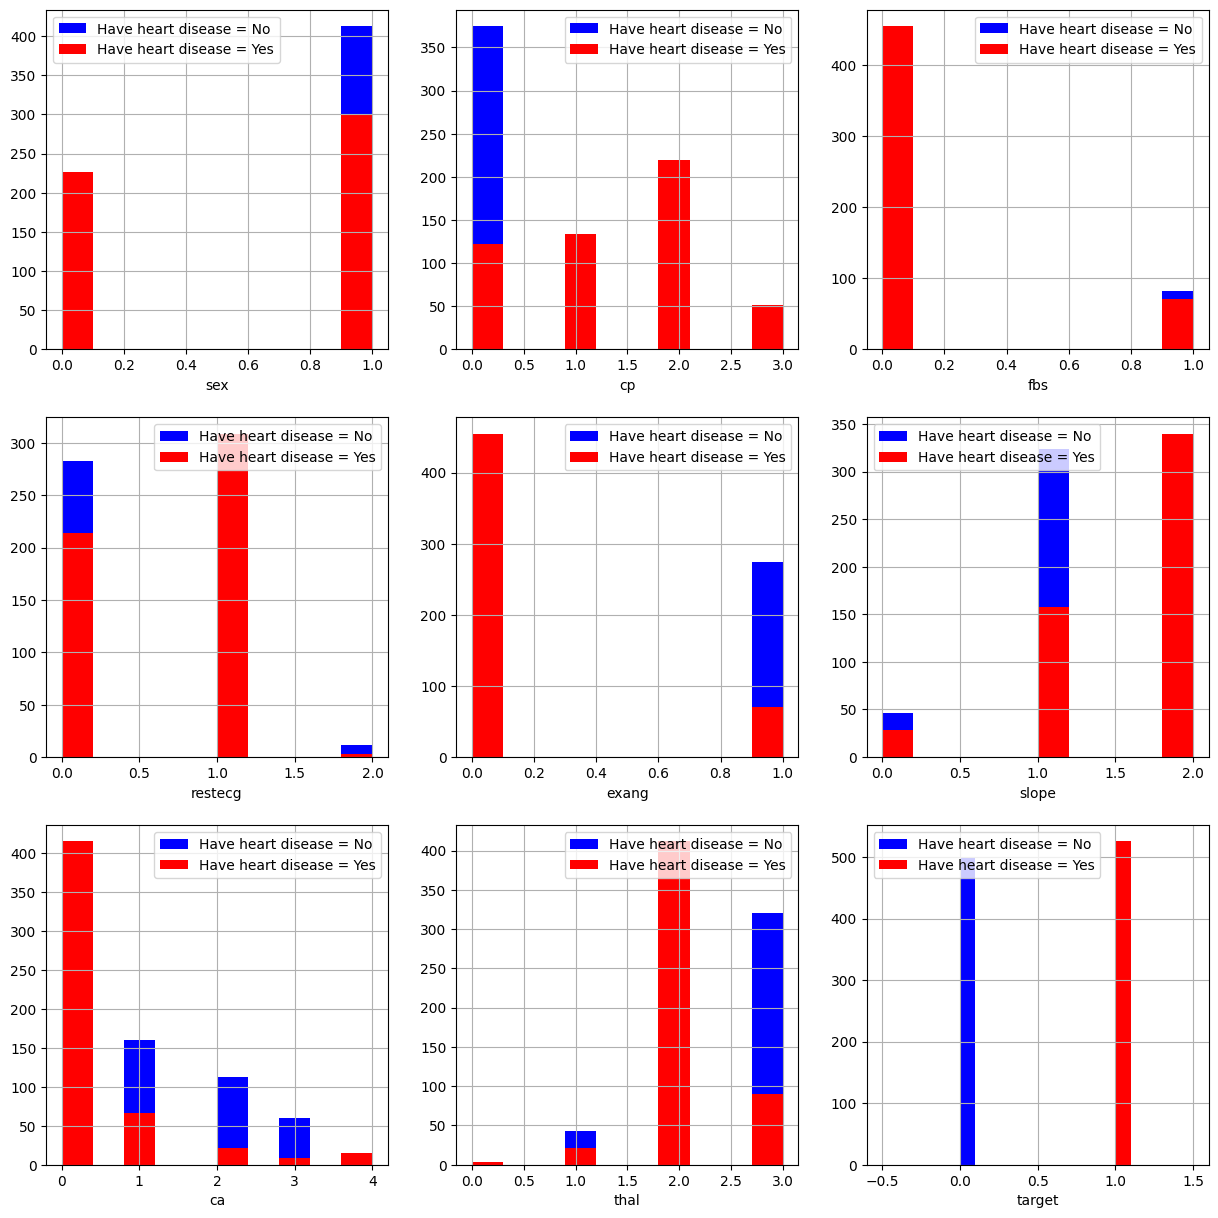

In [13]:
plt.figure(figsize=(15,15))
for i, col in enumerate(categorical_val, 1):
    plt.subplot(3,3,i)
    df[df["target"]==0][col].hist(color='blue', label='Have heart disease = No')
    df[df["target"]==1][col].hist(color='red', label='Have heart disease = Yes')
    plt.legend()
    plt.xlabel(col)
    

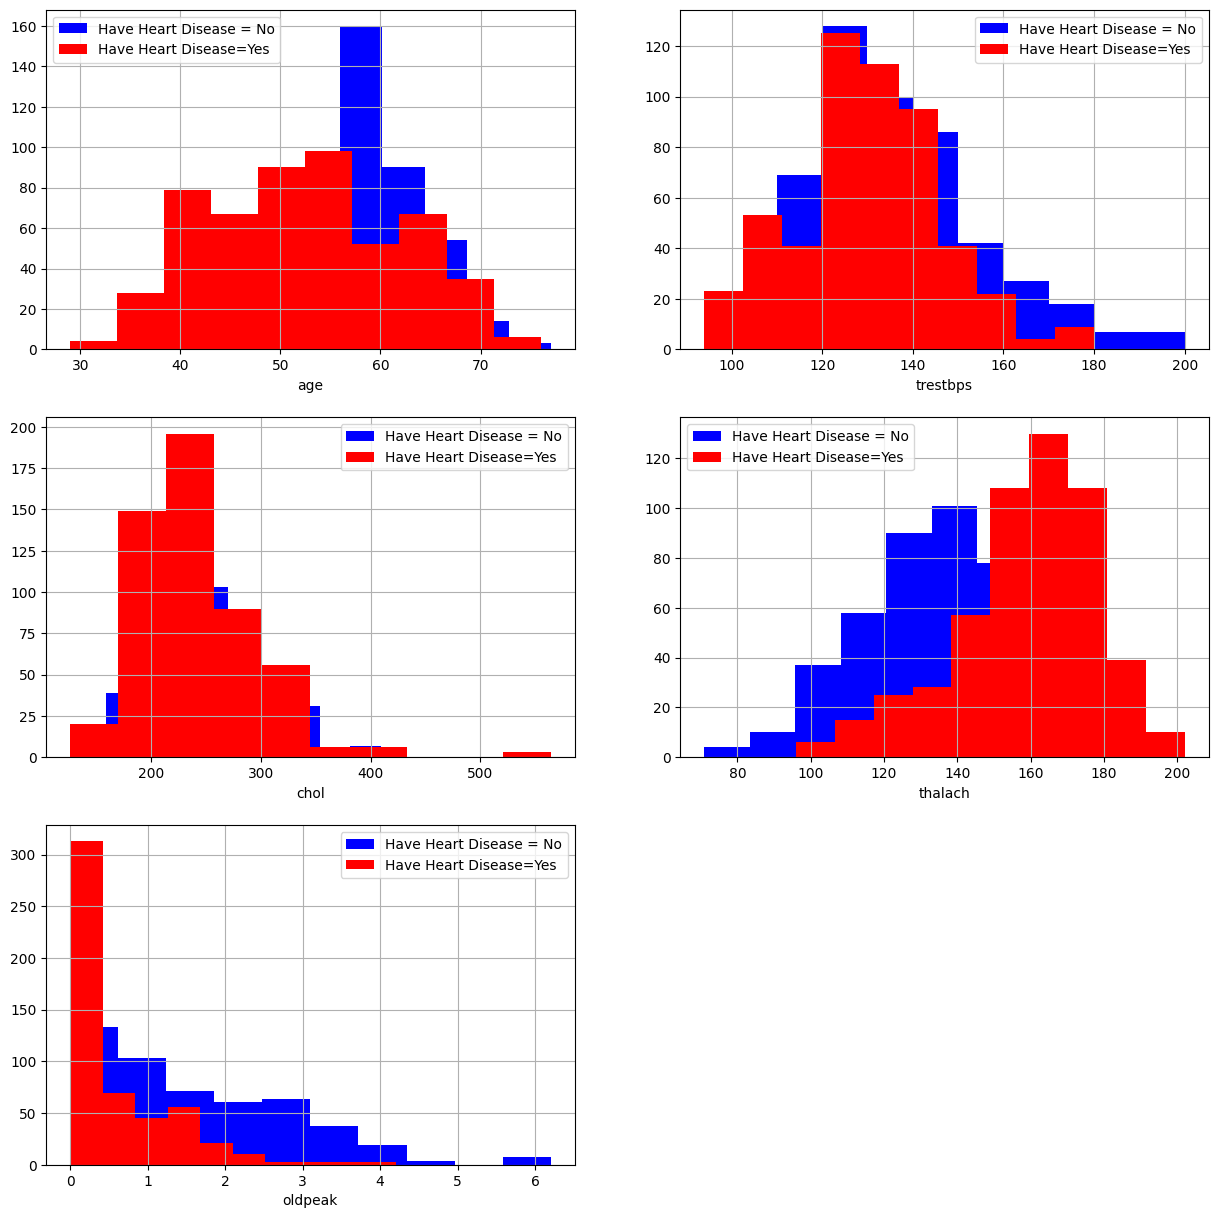

In [14]:
plt.figure(figsize=(15,15))
for i, col in enumerate(continuous_val, 1):
    plt.subplot(3,2,i)
    df[df["target"]==0][col].hist(color='blue', label='Have Heart Disease = No')
    df[df["target"]==1][col].hist(color='red',label='Have Heart Disease=Yes')
    plt.legend()
    plt.xlabel(col)
    

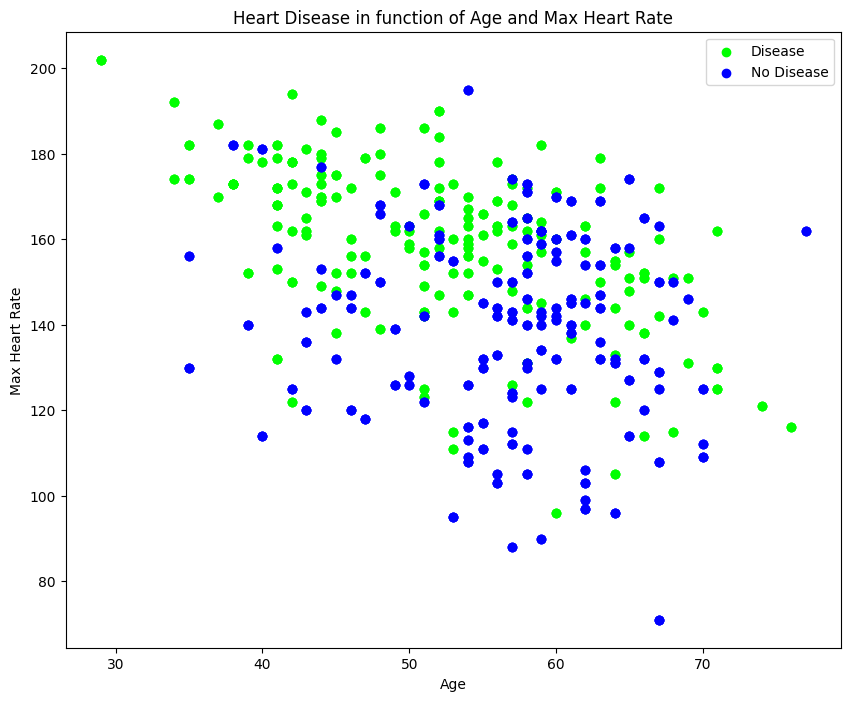

In [15]:
plt.figure(figsize=(10,8))
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c='lime')
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c='blue')
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])

In [16]:
#converting categorical data into binary values 
categorical_val.remove('target')
dataset = pd.get_dummies(df, columns=categorical_val)

In [20]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,False,True,True,False,...,True,False,False,True,False,False,False,False,False,True
1,53,140,203,155,3.1,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
2,70,145,174,125,2.6,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
3,61,148,203,161,0.0,0,False,True,True,False,...,True,False,True,False,False,False,False,False,False,True
4,62,138,294,106,1.9,0,True,False,True,False,...,False,False,False,False,True,False,False,False,True,False


In [17]:
#scaling continuos columns
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = sc.fit_transform(dataset[col_to_scale])

In [18]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0,False,True,True,False,...,True,False,False,True,False,False,False,False,False,True
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0,False,True,True,False,...,True,False,True,False,False,False,False,False,False,True
4,0.834359,0.364875,0.930822,-1.874977,0.705408,0,True,False,True,False,...,False,False,False,False,True,False,False,False,True,False


In [19]:
#splitting data for training and testing
from sklearn.model_selection import train_test_split

x = dataset.drop('target', axis=1)
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)


In [20]:
x_train.shape

(717, 30)

In [21]:
x_test.shape

(308, 30)

In [24]:
y_train.shape


(717,)

In [25]:
y_test.shape

(308,)

In [26]:
#building and training logistic regression model
from sklearn.linear_model import LogisticRegression

lr_clf_model = LogisticRegression()
lr_clf_model.fit(x_train, y_train)

LogisticRegression()

In [27]:
#predicting 
prediction = lr_clf_model.predict(x_test)

In [28]:
prediction

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,

In [31]:
print(y_test.values)

[0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0
 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1
 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1
 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1
 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 0 1 0 1
 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0
 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0
 0 1 1 0 1 1 1 1 1 1 0 0]


In [32]:
#Calculating accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, prediction)*100
print("Accuracy: ", accuracy)

Accuracy:  87.33766233766234


In [33]:
#evaluating model
from sklearn.metrics import confusion_matrix
lr_clf_matrix = confusion_matrix(y_test, prediction)
lr_clf_matrix

array([[130,  20],
       [ 19, 139]])

In [35]:
from sklearn.metrics import classification_report
lr_clf_report = classification_report(y_test, prediction)
print(lr_clf_report)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       150
           1       0.87      0.88      0.88       158

    accuracy                           0.87       308
   macro avg       0.87      0.87      0.87       308
weighted avg       0.87      0.87      0.87       308

